In [83]:
import numpy as np
import cv2
import os
import pandas as pd
import h5py
%matplotlib inline 
from matplotlib import pyplot as plt


In [84]:
# Open the file as readonly
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


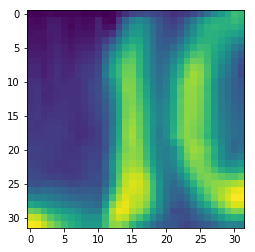

1


In [85]:
#Randomly print an image and it's label
plt.imshow(X_train[15000])
plt.show()
print(y_train[15000])

In [86]:
import keras
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Dense, Input, Dropout, Flatten, Activation, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD, RMSprop
from keras import backend as K
from keras.utils.np_utils import to_categorical  
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
import json
from sklearn.model_selection import train_test_split
K.set_image_dim_ordering('tf') 


In [87]:
import tensorflow as tf

In [88]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val,num_classes=10)

In [89]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [103]:
model1 = tf.keras.Sequential()

#Flatten layer 32 x 32 = 1024 parameters
model1.add(tf.keras.layers.Reshape((1024,), input_shape=(32,32,)))

model1.add(tf.keras.layers.BatchNormalization())

#First hidden layer
model1.add(tf.keras.layers.Dense(512,activation='relu'))
model1.add(tf.keras.layers.Dense(256,activation='relu'))
model1.add(tf.keras.layers.Dense(128,activation='relu'))
model1.add(tf.keras.layers.Dense(64,activation='relu'))
model1.add(tf.keras.layers.Dense(32,activation='relu'))

model1.add(tf.keras.layers.Dense(10,activation='softmax'))

#Compile
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
__________

In [92]:
model1.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=5, batch_size=500)

Train on 42000 samples, validate on 60000 samples
Epoch 1/5
42000/42000 [==============================] - 2s 43us/sample - loss: 1.8289 - acc: 0.3507 - val_loss: 1.2934 - val_acc: 0.5814
Epoch 2/5
42000/42000 [==============================] - 1s 30us/sample - loss: 1.0555 - acc: 0.6649 - val_loss: 0.9147 - val_acc: 0.7117
Epoch 3/5
42000/42000 [==============================] - 1s 31us/sample - loss: 0.8262 - acc: 0.7435 - val_loss: 0.7211 - val_acc: 0.7817
Epoch 4/5
42000/42000 [==============================] - 1s 31us/sample - loss: 0.7061 - acc: 0.7820 - val_loss: 0.6532 - val_acc: 0.8011
Epoch 5/5
42000/42000 [==============================] - 1s 31us/sample - loss: 0.6248 - acc: 0.8075 - val_loss: 0.5922 - val_acc: 0.8201


In [93]:
model1.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=10, batch_size=500)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 1s 30us/sample - loss: 0.5703 - acc: 0.8225 - val_loss: 0.5404 - val_acc: 0.8359
Epoch 2/10
42000/42000 [==============================] - 1s 30us/sample - loss: 0.5196 - acc: 0.8391 - val_loss: 0.5384 - val_acc: 0.8365
Epoch 3/10
42000/42000 [==============================] - 1s 31us/sample - loss: 0.4846 - acc: 0.8472 - val_loss: 0.4951 - val_acc: 0.8489
Epoch 4/10
42000/42000 [==============================] - 1s 34us/sample - loss: 0.4567 - acc: 0.8575 - val_loss: 0.4623 - val_acc: 0.8597
Epoch 5/10
42000/42000 [==============================] - 1s 35us/sample - loss: 0.4251 - acc: 0.8667 - val_loss: 0.4337 - val_acc: 0.8713
Epoch 6/10
42000/42000 [==============================] - 1s 30us/sample - loss: 0.3958 - acc: 0.8749 - val_loss: 0.4491 - val_acc: 0.8648
Epoch 7/10
42000/42000 [==============================] - 1s 32us/sample - loss: 0.3706 - acc: 0.8840 - val_loss: 0.

In [104]:
model1.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=20, batch_size=500)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 2s 43us/sample - loss: 1.6411 - acc: 0.4342 - val_loss: 1.1435 - val_acc: 0.6417
Epoch 2/20
42000/42000 [==============================] - 1s 29us/sample - loss: 0.9638 - acc: 0.6982 - val_loss: 0.8511 - val_acc: 0.7360
Epoch 3/20
42000/42000 [==============================] - 1s 31us/sample - loss: 0.7872 - acc: 0.7551 - val_loss: 0.7236 - val_acc: 0.7758
Epoch 4/20
42000/42000 [==============================] - 1s 30us/sample - loss: 0.6830 - acc: 0.7882 - val_loss: 0.6388 - val_acc: 0.8034
Epoch 5/20
42000/42000 [==============================] - 1s 31us/sample - loss: 0.6099 - acc: 0.8094 - val_loss: 0.5814 - val_acc: 0.8229
Epoch 6/20
42000/42000 [==============================] - 1s 30us/sample - loss: 0.5572 - acc: 0.8276 - val_loss: 0.5282 - val_acc: 0.8393
Epoch 7/20
42000/42000 [==============================] - 1s 30us/sample - loss: 0.5096 - acc: 0.8415 - val_loss: 0.

<b>Since changing the number of epochs doesn't help much with our validation loss, we can try changing the optimizer function</b>

In [95]:
#Creating a new model
tf.keras.backend.clear_session()
model2 = tf.keras.Sequential()

#Flatten layer 32 x 32 = 1024 parameters
model2.add(tf.keras.layers.Reshape((1024,), input_shape=(32,32,)))

model2.add(tf.keras.layers.BatchNormalization())

#First hidden layer
model2.add(tf.keras.layers.Dense(512,activation='relu'))
model2.add(tf.keras.layers.Dense(256,activation='relu'))
model2.add(tf.keras.layers.Dense(128,activation='relu'))
model2.add(tf.keras.layers.Dense(64,activation='relu'))
model2.add(tf.keras.layers.Dense(32,activation='relu'))

model2.add(tf.keras.layers.Dense(10,activation='softmax'))

#Compile
adam = tf.keras.optimizers.Adam(lr=0.,decay=0.1)
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [96]:
model2.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=5, batch_size=500)

Train on 42000 samples, validate on 60000 samples
Epoch 1/5
42000/42000 [==============================] - 2s 42us/sample - loss: 1.7080 - acc: 0.4131 - val_loss: 1.2268 - val_acc: 0.6201
Epoch 2/5
42000/42000 [==============================] - 1s 30us/sample - loss: 0.9777 - acc: 0.6973 - val_loss: 0.8491 - val_acc: 0.7401
Epoch 3/5
42000/42000 [==============================] - 1s 31us/sample - loss: 0.7814 - acc: 0.7573 - val_loss: 0.7031 - val_acc: 0.7864
Epoch 4/5
42000/42000 [==============================] - 2s 37us/sample - loss: 0.6820 - acc: 0.7873 - val_loss: 0.6424 - val_acc: 0.8040
Epoch 5/5
42000/42000 [==============================] - 1s 31us/sample - loss: 0.6153 - acc: 0.8090 - val_loss: 0.5851 - val_acc: 0.8222


In [97]:
model2.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=10, batch_size=500)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 1s 32us/sample - loss: 0.5493 - acc: 0.8283 - val_loss: 0.5636 - val_acc: 0.8277
Epoch 2/10
42000/42000 [==============================] - 1s 34us/sample - loss: 0.5161 - acc: 0.8402 - val_loss: 0.5182 - val_acc: 0.8425
Epoch 3/10
42000/42000 [==============================] - 2s 42us/sample - loss: 0.4746 - acc: 0.8505 - val_loss: 0.4674 - val_acc: 0.8590
Epoch 4/10
42000/42000 [==============================] - 1s 30us/sample - loss: 0.4332 - acc: 0.8648 - val_loss: 0.4334 - val_acc: 0.8698
Epoch 5/10
42000/42000 [==============================] - 1s 30us/sample - loss: 0.4115 - acc: 0.8695 - val_loss: 0.4344 - val_acc: 0.8705
Epoch 6/10
42000/42000 [==============================] - 1s 31us/sample - loss: 0.3826 - acc: 0.8797 - val_loss: 0.4140 - val_acc: 0.8764
Epoch 7/10
42000/42000 [==============================] - 1s 30us/sample - loss: 0.3617 - acc: 0.8855 - val_loss: 0.

In [98]:
model2.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=20, batch_size=500)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 1s 31us/sample - loss: 0.2813 - acc: 0.9110 - val_loss: 0.3418 - val_acc: 0.9034
Epoch 2/20
42000/42000 [==============================] - 1s 28us/sample - loss: 0.2608 - acc: 0.9173 - val_loss: 0.3379 - val_acc: 0.9046
Epoch 3/20
42000/42000 [==============================] - 1s 31us/sample - loss: 0.2488 - acc: 0.9207 - val_loss: 0.3628 - val_acc: 0.9001
Epoch 4/20
42000/42000 [==============================] - 1s 29us/sample - loss: 0.2312 - acc: 0.9259 - val_loss: 0.3245 - val_acc: 0.9106
Epoch 5/20
42000/42000 [==============================] - 1s 30us/sample - loss: 0.2243 - acc: 0.9285 - val_loss: 0.3295 - val_acc: 0.9100
Epoch 6/20
42000/42000 [==============================] - 1s 30us/sample - loss: 0.2221 - acc: 0.9288 - val_loss: 0.3460 - val_acc: 0.9051
Epoch 7/20
42000/42000 [==============================] - 1s 30us/sample - loss: 0.2201 - acc: 0.9291 - val_loss: 0.

By editing the learning rate we were not able to reduce the validation loss. We can try using Dropout to delete unused nodes

In [99]:
tf.keras.backend.clear_session()
model3 = tf.keras.Sequential()

#Flatten layer 32 x 32 = 1024 parameters
model3.add(tf.keras.layers.Reshape((1024,), input_shape=(32,32,)))

model3.add(tf.keras.layers.BatchNormalization())

#First hidden layer
model3.add(tf.keras.layers.Dense(512,activation='relu'))
model3.add(tf.keras.layers.Dropout(0.4))
model3.add(tf.keras.layers.Dense(256,activation='relu'))
model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.Dense(128,activation='relu'))
model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.Dense(64,activation='relu'))
model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.Dense(32,activation='relu'))

model3.add(tf.keras.layers.Dense(10,activation='softmax'))

#Compile
adam = tf.keras.optimizers.Adam(lr=0.,decay=0.1)
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model3.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=20, batch_size=500)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 2s 45us/sample - loss: 2.3083 - acc: 0.1257 - val_loss: 2.2125 - val_acc: 0.1937
Epoch 2/20
42000/42000 [==============================] - 1s 31us/sample - loss: 1.9529 - acc: 0.2931 - val_loss: 1.4474 - val_acc: 0.5116
Epoch 3/20
42000/42000 [==============================] - 1s 31us/sample - loss: 1.4946 - acc: 0.4866 - val_loss: 1.1405 - val_acc: 0.6314
Epoch 4/20
42000/42000 [==============================] - 1s 31us/sample - loss: 1.2864 - acc: 0.5792 - val_loss: 0.9915 - val_acc: 0.6923
Epoch 5/20
42000/42000 [==============================] - 1s 30us/sample - loss: 1.1470 - acc: 0.6388 - val_loss: 0.8718 - val_acc: 0.7363
Epoch 6/20
42000/42000 [==============================] - 1s 30us/sample - loss: 1.0556 - acc: 0.6713 - val_loss: 0.8033 - val_acc: 0.7580
Epoch 7/20
42000/42000 [==============================] - 1s 31us/sample - loss: 0.9819 - acc: 0.6954 - val_loss: 0.

In [100]:
tf.keras.backend.clear_session()
model4 = tf.keras.Sequential()

#Flatten layer 32 x 32 = 1024 parameters
model4.add(tf.keras.layers.Reshape((1024,), input_shape=(32,32,)))

model4.add(tf.keras.layers.BatchNormalization())

#First hidden layer
model4.add(tf.keras.layers.Dense(512,activation='relu'))
model4.add(tf.keras.layers.Dropout(0.4))
model4.add(tf.keras.layers.Dense(256,activation='relu'))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(128,activation='relu'))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(64,activation='relu'))
model4.add(tf.keras.layers.Dense(32,activation='relu'))

model4.add(tf.keras.layers.Dense(10,activation='softmax'))

#Compile
adam = tf.keras.optimizers.Adam(lr=0.1,decay=0.1)
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model4.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=20, batch_size=500)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 2s 45us/sample - loss: 2.3057 - acc: 0.1188 - val_loss: 2.2263 - val_acc: 0.1632
Epoch 2/20
42000/42000 [==============================] - 1s 30us/sample - loss: 1.7944 - acc: 0.3628 - val_loss: 1.2472 - val_acc: 0.6055
Epoch 3/20
42000/42000 [==============================] - 1s 32us/sample - loss: 1.2914 - acc: 0.5802 - val_loss: 0.9694 - val_acc: 0.7012
Epoch 4/20
42000/42000 [==============================] - 1s 30us/sample - loss: 1.1004 - acc: 0.6534 - val_loss: 0.8464 - val_acc: 0.7464
Epoch 5/20
42000/42000 [==============================] - 1s 30us/sample - loss: 0.9979 - acc: 0.6876 - val_loss: 0.7758 - val_acc: 0.7666
Epoch 6/20
42000/42000 [==============================] - 1s 31us/sample - loss: 0.9267 - acc: 0.7094 - val_loss: 0.7314 - val_acc: 0.7788
Epoch 7/20
42000/42000 [==============================] - 1s 30us/sample - loss: 0.8635 - acc: 0.7338 - val_loss: 0.

Introducing Dropout gives undesired output. Trying with Relu Activation function. Athough all Dense layers already have Relu activation

In [101]:
tf.keras.backend.clear_session()
model5 = tf.keras.Sequential()

#Flatten layer 32 x 32 = 1024 parameters
model5.add(tf.keras.layers.Reshape((1024,), input_shape=(32,32,)))

model5.add(tf.keras.layers.Activation('relu'))

#First hidden layer
model5.add(tf.keras.layers.Dense(512,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.4))
model5.add(tf.keras.layers.Dense(256,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
model5.add(tf.keras.layers.Dense(128,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
model5.add(tf.keras.layers.Dense(64,activation='relu'))
model5.add(tf.keras.layers.Dense(32,activation='relu'))

model5.add(tf.keras.layers.Dense(10,activation='softmax'))

#Compile
adam = tf.keras.optimizers.Adam(lr=1,decay=0.3)
model5.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
model5.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=20, batch_size=500)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 2s 39us/sample - loss: 14.4803 - acc: 0.1006 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/20
42000/42000 [==============================] - 1s 27us/sample - loss: 14.4940 - acc: 0.1008 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/20
42000/42000 [==============================] - 1s 28us/sample - loss: 14.4940 - acc: 0.1008 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/20
42000/42000 [==============================] - 1s 28us/sample - loss: 14.4940 - acc: 0.1008 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/20
42000/42000 [==============================] - 1s 27us/sample - loss: 14.4940 - acc: 0.1008 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/20
42000/42000 [==============================] - 1s 29us/sample - loss: 14.4940 - acc: 0.1008 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/20
42000/42000 [==============================] - 1s 28us/sample - loss: 14.4940 - acc: 0.1008 -

In [105]:
pred = model1.predict(X_test)

In [106]:
pred[99]

array([8.8788719e-09, 8.3746534e-07, 9.7289849e-08, 1.2970570e-06,
       2.9906161e-08, 1.4262328e-09, 3.3988093e-10, 9.9999774e-01,
       3.2280078e-11, 1.4649792e-08], dtype=float32)

In [107]:
y_test[99]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [108]:
pred=model1.predict_classes(X_test)

In [109]:
pred[99]

7

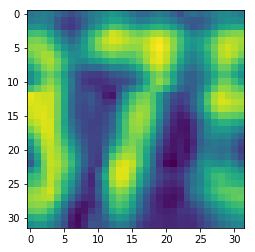

In [110]:
plt.imshow(X_test[99])
plt.show()

Model 1 with simultaneous Dense layers with nodes having Relu Activation Function and  count changing by a factor of 2 in each subsequent layer without any dropout function has the highest accuracy in validation and the lowest validation loss.